<>:7: DeprecationWarning: invalid escape sequence '\$'
<>:7: DeprecationWarning: invalid escape sequence '\$'
/var/folders/pc/_bbfbcy17hd_6pdh6t0v7hh00000gp/T/ipykernel_1187/3419096284.py:7: DeprecationWarning: invalid escape sequence '\$'
  df['price_as_int']=df.price.str.replace('[\$\,\.]', '', regex=True).astype(int)/100
/var/folders/pc/_bbfbcy17hd_6pdh6t0v7hh00000gp/T/ipykernel_1187/3419096284.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


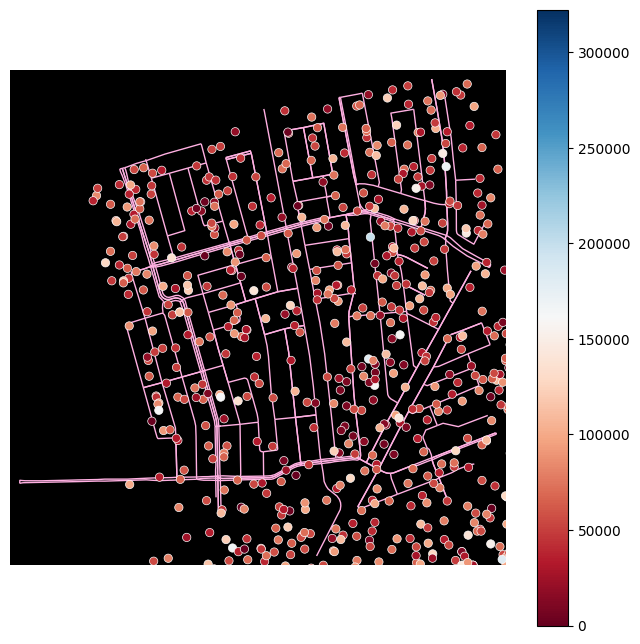

In [3]:
import osmnx as ox
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('listings_am.csv')
df['price_as_int']=df.price.str.replace('[\$\,\.]', '', regex=True).astype(int)/100
df.loc[:, 'day']=365-df['availability_365']
df.loc[:, 'max_profit']=df['day']*df['price_as_int']
used_columns=df[['max_profit','price','longitude' ,'latitude','neighbourhood_cleansed']]
De_Baarsjes=used_columns[used_columns['neighbourhood_cleansed']=='De Baarsjes - Oud-West']
bgcolor = 'black'
edge_color = '#FFB0E2'
bldg_color = 'lightgrey'
point = (52.368453, 4.857034)
dist = 500
bbox = ox.utils_geo.bbox_from_point(point, dist=dist)
G = ox.graph_from_point(point, network_type='drive', dist=dist, truncate_by_edge=True, retain_all=True)
fig, ax = ox.plot_graph(G, bgcolor=bgcolor, node_size=0, edge_color=edge_color, show=False)
ax=sns.scatterplot(ax=ax, x='longitude',y='latitude',data=De_Baarsjes, hue='max_profit', palette='RdBu')
norm = plt.Normalize(De_Baarsjes['max_profit'].min(), De_Baarsjes['max_profit'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
